# Agent-Based Pathogen

✅ Taekyu Kim, Jun Han, Jiahao Xu, Michael Quintieri

### How well can an agent-based model represent a mutating pathogen among a population?



This is the code for our project, using an agent-based model to simulate a mutating pathogen among a population. We hope you enjoy our simulation and our presentation on Monday. Thank you for reading.

In [1]:
# Necessary inputs; nothing too exotic or unexpected.
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

# Person (Agent)

In [2]:
# This class is the agent in our agent-based model.
# Multiple person objects wander the environment, spreading their viruses to each other.

class Person:
    """
    This is the Person object, the agent for our agent-based model. The methods here handle the behavior of the agents during the simulation.
    """
#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This is a standard init function, with various parameters to be used in the other functions as described therein.
    def __init__(self, x, y, infected = False, virus_type = None, immune = False, xmax = 100, ymax = 100):
        """
        This function initializes the Person.
        Inputs:
            x: The x value of the person
            y: The y value of the person.
            infected: A boolean describing whether the Person is infected.
            virus_type: Stores the type of Virus contained within the Person.
            immune: A boolean describing whether the Person is immune to infection.
            xmax: The maximum x-value for the Person object.
            ymax: The maximum y-value for the Person object
        Outputs:
            Packs the inputs into the Person object.
        """
        self.x = x 
        self.y = y  
        self.infected = infected 
        self.virus_type = virus_type  
        self.alive = True  
        self.immune = immune 
        self.days_infected = 0  
        self.xmax = xmax
        self.ymax = ymax

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This move function allows the agent to change its position, moving randomly around the environment.
    def move(self):
        """
        This function allows the Person to move.
        Inputs:
            None required, only needs the Person itself.
        Outputs:
            None returned; updates self.x and self.y so the Person can move.
        """
        # Healthy agents are handled first.
        # This is because sick agents have reduced movement.
        if not self.infected:
            
            # A vertical or horizontal direction is randomly selected for the move.
            dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
            
            # X and y distances are randomly decided for the move, in the previously decided direction.
            # Healthy agents can move up to 20 spaces.
            new_x = self.x + random.randint(1, 20) * dx
            new_y = self.y + random.randint(1, 20) * dy
            
            # This portion checks whether the agent is seeking to move outside of the simulation bounds.
            # If so, the person instead ends up on the boundary.
            if (new_x > self.xmax):
                new_x = self.xmax
            if (new_x < 0):
                new_x = 0
            if (new_y > self.ymax):
                new_y = self.ymax
            if (new_y < 0):
                new_y = 0
        
        # This code is fundamentally the same as above, but it is working on the infected agents.
        else:
            # Deciding on a direction.
            dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
            
            # Infected agents can move up to 10 spaces, rather than the 20 for healthy agents.
            new_x = self.x + random.randint(1, 10) * dx
            new_y = self.y + random.randint(1, 10) * dy
            
            # This is the same boundary containment code as above.
            if (new_x > self.xmax):
                new_x = self.xmax
            if (new_x < 0):
                new_x = 0
            if (new_y > self.ymax):
                new_y = self.ymax
            if (new_y < 0):
                new_y = 0
        
        # For both healthy and infected agents, these two lines update the position to the newly decided coordinates.
        self.x = new_x
        self.y = new_y
    
#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function allows an agent to become infected with a virus of a given type.
    def infect(self, virus_type):
        """
        This function allows a healthy Person to be infected.
        Inputs:
            virus_type: A type of virus, which will infect the Person agent.
        Outputs:
            None returned; infects the Person with the given virus if not immune.
        """
        # If the agent is not immune to a virus of the given type, the function can proceed.
        if not self.is_immune_to(virus.virus_type):
           
            # The infected value is simply set to True, and the virus_type is set to the provided virus type.
            self.infected = True
            self.virus_type = virus_type

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function checks whether the agent is immune to a given virus.
    def is_immune_to(self, virus_type):
        """
        This function checks whether the agent is immune to a given virus.
        Inputs:
            virus_type: A type of virus to check.
        Outputs:
            A boolean describing whether the agent's virus type is equal to the given virus.
        """
        # If the immune boolean is false, or the agent is not infected, the agent is not immune.
        if not self.immune or self.virus_type is None:
            return False
        
        # This line returns a boolean describing whether the agent's virus type is equal to the given virus.
        return self.virus_type.virus_type == virus_type

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function allows the agent to recover from its illness.
    def recover(self):
        """
        This function allows the Person to recover.
        Inputs:
            None, just requires the Person itself.
        Outputs:
            None returned, sets self.infected to False, self.virus_type to None, and self.immune to True.
        """
        # The agent is determined to not be infected, to have no virus, and to be immune.
        self.infected = False
        self.virus_type = None
        self.immune = True

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function allows the agent to die.
    def die(self):
        """
        This function allows the Person to die.
        Inputs:
            None, just requires the Person itself.
        Outputs:
            None returned, sets self.alive to False.
        """
        # The agent's alive boolean is simply set to False.
        self.alive = False

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function allows the agent to update itself, essentially incrementing its timestep.
    def update(self):
        """
        This function allows the agent to update itself, increasing its timestep.
        Inputs:
            None, just requires the Person itself.
        Outputs:
            The updated Virus from within the Person.
        """
        # If the agent is infected, the virus is updated. 
        # This allows time to pass for the virus, enabling recovery and death.
        if self.infected:
            self.virus_type = self.virus_type.update()
        
        # The updated virus is returned.
        return self.virus_type

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function simply returns a boolean describing whether the agent is immune.
    def is_immune(self):
        """
        This returns a boolean describing whether the agent is immune.
        Inputs:
            None, just requires the Person itself.
        Outputs:
            A boolean dictating whether the agent is immune.
        """
        return self.immune

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# Virus

In [3]:
# Virus objects are contained within the simulation's agents.
# The virus is spread between agents, and changes over time.

class Virus:
    """
    This is the virus object for the simulation.
    The Virus object spreads between Person objects, and can mutate over time as it spreads.
    """

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This is a typical init function, containing the parameters which will be used in other functions.
    def __init__(self, virus_type, recovery_days, mortality_rate, transmission_rate, infection_distance):
        """
        This function initializes the virus.
        Inputs:
            virus_type: The type of the virus, specially defined.
            recovery_days: The amount of time it takes to recover from the virus.
            mortality_rate: The virus' mortality rate.
            transmission_rate: The virus' transmission rate.
            infection_distance: The distance over which the virus can be transmitted.
        Outputs:
            Packs the inputs into the virus object.
        """
        self.virus_type = virus_type
        self.recovery_days = recovery_days
        self.mortality_rate = mortality_rate
        self.transmission_rate = transmission_rate
        self.infection_distance = infection_distance

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function simply returns the virus' recovery time.
    def get_recovery_time(self):
        """
        This function returns the virus' recovery time.
        Inputs:
            None, just requires the virus itself.
        Outputs:
            Returns the virus' recovery time.
        """
        return self.recovery_time

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # Likewise, this function returns the virus' death rate.
    def get_death_rate(self):
        """
        This function returns the virus' death rate.
        Inputs:
            None, just requires the virus itself.
        Outputs:
            Returns the virus' death rate.
        """
        return self.death_rate

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # Finally, this function returns the transmission rate.
    def get_transmission_rate(self):
        """
        This function returns the virus' transmission rate.
        Inputs:
            None, just requires the virus itself.
        Outputs:
            Returns the virus' transmission rate.
        """
        return self.transmission_rate

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function handles the viral mutations.
    def update(self):
        """
        This function handles the mutation of the virus on transmission.
        Inputs:
            None, just requires the virus itself.
        Outputs:
            Returns the virus, possibly mutated.
        """
        # Every time this function is called, there is a 20% chance for a virus to mutate.
        update_chance = 0.20
        if random.random() < update_chance:
            
            # The alpha strain is the starting version of the virus.
            if self.virus_type == "alpha":
                return Virus("beta", self.recovery_days, self.mortality_rate * 1.1, self.transmission_rate * 1.1, self.infection_distance)
            
            # The alpha strain becomes the beta strain, increasing its attributes through "mutation."
            elif self.virus_type == "beta":
                return Virus("delta", self.recovery_days, self.mortality_rate * 1.2, self.transmission_rate * 1.2, self.infection_distance + 10)
            
            # Likewise, the beta strain becomes the delta strain.
            elif self.virus_type == "delta":
                return Virus("omicron", self.recovery_days, self.mortality_rate * 0.5, self.transmission_rate * 2, self.infection_distance + 10)
        
        # Finally, the virus is returned--whether it has updated or not.
        return self

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# Environment

In [4]:
# This is the environment for our agent-based model.
# Agents wander through the environment, infecting each other with an evolving virus.
# Many other important functions are handled here, as well.
class Environment:
    """
    This is the environment for the agent-based model. The majority of the simulation is handled in the methods here, calling back to the Person and Virus objects as needed for simulation purposes.
    """

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # Once again, a standard init function.
    # Note that the standard size of the environment is now 100 by 100.
    # This is the code that actually establishes the environment.
    def __init__(self, xmax = 100, ymax = 100):
        """
        This function initializes the environment.
        Inputs:
            xmax and ymax: Maximum x and y values for the environment. Default to 100 by 100.
        Outputs:
            Sets up various quantities needed for the simulation, including starting with no virus, no deaths or infections, and an empty list of people. Also initializes an empty array for the actual environment.
        """
        self.xmax = xmax
        self.ymax = ymax
        self.people = []
        self.virus = None
        self.dead_count = 0
        self.infect_count = 0
        self.environ = np.zeros((self.xmax, self.ymax, 3))
        self.environ[:, :, 0] = 0.8
        self.environ[:, :, 1] = 0.8
        self.environ[:, :, 2] = 0.8

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function allows for people to be added to the environment.
    # It is given an agent, and simply appends it to a list (which is initially empty).
    def add_person(self, person):
        """
        This function returns the number of agents that have died.
        Inputs:
            person: A Person object.
        Outputs:
            None returned; adds person to the environment's list of people.
        """
        self.people.append(person)

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # Likewise, this function adds a virus. There is only one virus at any given point, this is not a list.
    def add_virus(self, virus):
        """
        This function adds a virus to the environment.
        Inputs:
            virus: A Virus object.
        Outputs:
            None returned, just sets the environment's virus to the input.
        """
        self.virus = virus

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function simply returns the current virus.
    def get_virus(self):
        """
        This function returns the current virus.
        Inputs:
            None, just requires the environment itself.
        Outputs:
            Returns the environment's virus.
        """
        return self.virus

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # Given two agents, this function simply calculates and returns the distance between the two of them.
    # This is used to check whether one of them will infect the other.
    def get_distance(self, person1, person2):
        """
        This function calculates the distance between two agents.
        Inputs:
            person 1 and person2: Two Person objects.
        Outputs:
            The distance between the two Person objects.
        """
        
        return np.sqrt((person1.x - person2.x)**2 + (person1.y - person2.y)**2)

#-==-==-==-==-==-==-==-==-==-==-==-==-==-
    
    # This large function handles the actual simulation; it takes a number and simulates that many timesteps.
    def simulate(self, times):
        """
        This function handles the actual simulation.
        Input:
            times: Number of timesteps to run the simulation.
        Outputs:
            Nothing returned; graphs the animation and updates various other quantities to simulate the situation.
        """
    
        # The function loops through each timestep.
        for day in range(times):
            
            # This is where each strain of virus is given its own color.
            virus_colors = {
            "alpha": "yellow",
            "beta": "orange",
            "delta": "red",
            "omicron": "darkred"
            }
            
            # These are various graphical statements to produce our animated visualization.
            clear_output(wait = True)
            plt.figure(figsize = (6, 6))
            plt.imshow(self.environ)
            ax = plt.gca()
            
            # This loops through each agent and its index in the list of agents.
            # This is where the meat of the actual simulation happens.
            for i, person in enumerate(self.people):
                
                # First, the agent moves itself.
                person.move()
                
                # If the agent is not immune, this portion checks whether they should be infected.
                if not person.is_immune():
                    
                    # This is done by looping through all other agents and making a number of other effects...
                    for j, other_person in enumerate(self.people):
                        if i != j and other_person.infected:
                            
                            # We consider the other agent's virus, and calculate the distance between the two agents.
                            virus = other_person.virus_type
                            distance = self.get_distance(person, other_person)
                            
                            # If the distance is less than the virus' infection distance...
                            if distance < self.virus.infection_distance:
                                # ...and if a random number is less than the virus' transmission rate...
                                if random.random() < self.virus.transmission_rate:
                                    # ... and if the agent is not already infected...
                                    if not person.infected:
                                        # ...then the agent is set as infected.
                                        person.infected = True
                                        
                                        # They are given the other agent's virus, which may mutate upon transmission.
                                        virus = other_person.update()
                                        person.virus_type = virus
                                        
                                        # Each time an agent is infected, the total number of infections increments by 1.
                                        self.infect_count += 1
                
                # On the other hand, this portion handles the simulation of infected agents.
                if person.infected:
                    
                    # The agent's color is set depending on its virus, using the previously defined values.
                    color = virus_colors.get(person.virus_type.virus_type)
                    
                    # If a random number is less than the virus' mortality rate, the agent dies.
                    if random.random() < self.virus.mortality_rate:
                        
                        # Each time an agent dies, the death count increments by 1.
                        self.dead_count += 1
                        
                        # The dead agent is removed from the list of agents.
                        self.people.pop(i)
                    
                    # If the agent has been infected for longer than the virus' recovery time, they recover and are made immune.
                    elif person.days_infected >= self.virus.recovery_days:
                        person.infected = False
                        person.immune = True
                    
                    # If none of these things are true, the agent remains infected.
                    # The counter that determines how long they have been infected increments by 1.
                    else:
                        person.days_infected += 1
                
                # If an agent is immune, they are drawn in green.
                if person.immune:
                    color = "green"
                
                # If an agent is not immune but not infected (and, of course, not dead), they are drawn in blue.
                elif not person.infected:
                    color = 'blue'
                
                # This scatter plot is the actual visualization.
                ax.scatter(person.x, person.y, c = color)
            
            # Here, the plotting is done.
            plt.xlim(0, self.xmax)
            plt.ylim(0, self.ymax)
            plt.show()
            
            # This sleep function handles the animation.
            time.sleep(0.001)

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function simply returns the number of agents that have died.
    def get_death(self):
        """
        This function returns the number of agents that have died.
        Inputs:
            None, just requires the environment itself.
        Outputs:
            Returns the number of agents that have died.
        """
        return self.dead_count

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

    # This function simply returns the number of agents that have recovered.
    def get_infected(self):
        """
        This function returns the number of agents that have been infected.
        Inputs:
            None, just requires the environment itself.
        Outputs:
            Returns the number of agents that have been infected.
        """
        return self.infect_count

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# Simulation

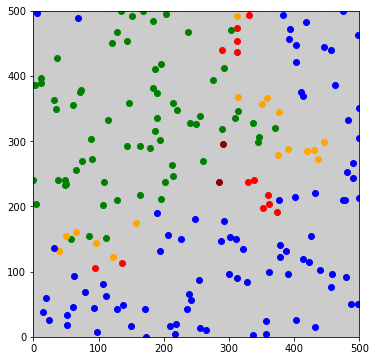

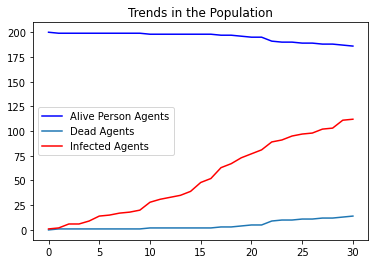

In [6]:
#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# This cell is written to simulate a 500 by 500 environment.
env = Environment(500,500)

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# We start off by adding the basic alpha strain of the virus.
vir = Virus('alpha', 10, 0.01, 0.1, 50)
env.add_virus(vir)

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# We add 200 agents to the simulation.
for i in range(200):
    x, y = random.randint(0, 499), random.randint(0, 499)
    person = Person(x, y, xmax = 500, ymax = 500)
    env.add_person(person)

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# This simulations starts off with one infected agent.
infected_people = random.sample(env.people, 1)
for person in infected_people:
    person.infected = True
    person.virus_type = vir

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# Here, we initialize various lists to hold quantities over time.
a = 0
alive = []
dead = []
infected = []
days = []

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# In this case, we run the simulation for a month, storing various quantities along the way.
while a <= 30:
    env.simulate(1)
    de = env.get_death()
    inf = env.get_infected()
    live = 200 - de
    alive.append(live)
    dead.append(de)
    infected.append(inf)
    days.append(a)
    im = live- de- inf

    a = a + 1

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

# This portion simply plots various trends over time after running the simulation. 
plt.plot(days, alive, label = "Alive Person Agents", color = 'blue')
plt.plot(days, dead, label = "Dead Agents")
plt.plot(days, infected, label = "Infected Agents", color = 'red')

plt.title("Trends in the Population")

plt.legend()
plt.show()

#-==-==-==-==-==-==-==-==-==-==-==-==-==-

In [7]:
# This cell gathers some data for the previous run of the simulation. 
# Several instances of this are used in the cells below to show very rough average trends over multiple runs.
# If this were done many times, the results could be used to develop a statistical model for the progress of a disease with the given initial conditions.

print("alive")
print (alive[0],alive[10],alive[20],alive[30])
print("Dead")
print (dead[0],dead[10],dead[20],dead[30])
print("Infected")
print (infected[0],infected[10],infected[20],infected[30])

alive
200 198 195 186
Dead
0 2 5 14
Infected
1 28 77 112


1.

alive
500 497 494 491

Dead
0 3 6 9

Infected
0 46 96 112

2.

alive
500 498 493 490

Dead
0 2 7 10

Infected
1 23 36 62


3.

alive
500 499 495 493

Dead
0 1 5 7

Infected
1 34 72 108

4.

alive
500 500 494 491

Dead
0 0 6 9

Infected
0 16 41 65

5.

alive
500 499 498 493

Dead
0 1 2 7

Infected
0 29 67 104


6.

alive
500 500 499 498

Dead
0 0 1 2

Infected
1 14 19 38

Text(0, 0.5, 'Number')

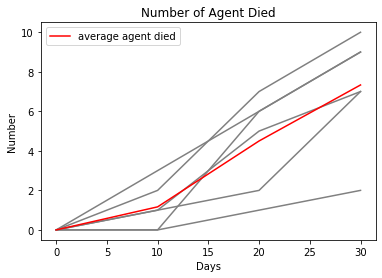

In [8]:
# This cell takes into account six runs of the simulation, including manually collected data from those runs. 
# At the end, the deaths over time are graphed.

alive1 = [500, 497, 494, 491]

Dead1 = [0, 3, 6, 9]

Infected1=[0, 46, 96, 112]


alive2 = [500, 498, 493, 490]

Dead2 = [0, 2, 7, 10]

Infected2 = [1, 23, 36, 62]



alive3 = [500, 499, 495, 493]

Dead3 = [0, 1, 5, 7]

Infected3 = [1, 34, 72, 108]



alive4 = [500, 500, 494, 491]

Dead4 = [0, 0, 6, 9]

Infected4 = [0, 16, 41, 65]


alive5 = [500, 499, 498, 493]

Dead5 = [0, 1, 2, 7]

Infected5 = [0, 29, 67, 104]



alive6 = [500, 500, 499, 498]

Dead6 = [0, 0, 1, 2]

Infected6 = [1, 14, 19, 38]

average_Dead = [(Dead1[i] + Dead2[i] + Dead3[i] + Dead4[i] + Dead5[i] + Dead6[i]) / 6 for i in range(len(Dead1))]
average_Infected = [(Infected1[i] + Infected2[i] + Infected3[i] + Infected4[i] + Infected5[i] + Infected6[i]) / 6 for i in range(len(Infected1))]


day = [0, 10, 20, 30]

plt.plot(day, Dead2, color = 'grey')
plt.plot(day, Dead3, color = 'grey')
plt.plot(day, Dead1, color = 'grey')
plt.plot(day, Dead4, color = 'grey')
plt.plot(day, Dead5, color = 'grey')
plt.plot(day, Dead6, color = 'grey')
plt.plot(day, average_Dead, color = 'red', label = 'average agent died')
plt.legend()
plt.title("Number of Agent Died")
plt.xlabel("Days")
plt.ylabel("Number")

Text(0, 0.5, 'Number')

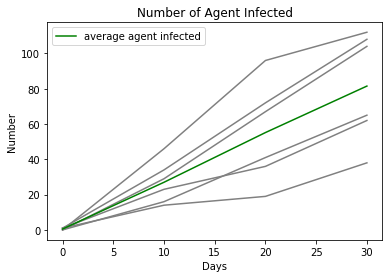

In [9]:
# For the statistical plots, this cell graphs the infected data.

plt.plot(day, Infected2, color = 'grey')
plt.plot(day, Infected3, color = 'grey')
plt.plot(day, Infected1, color = 'grey')
plt.plot(day, Infected4, color = 'grey')
plt.plot(day, Infected5, color = 'grey')
plt.plot(day, Infected6, color = 'grey')
plt.plot(day, average_Infected, color = 'Green', label = 'average agent infected')
plt.legend()
plt.title("Number of Agent Infected")
plt.xlabel("Days")
plt.ylabel("Number")

Thank you for reading through our project notebook! We hope you enjoy our presentation!